<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [117]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [118]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

#### Read the dataset in the csv file from the URL


In [119]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [120]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 4: For all visualizations, please include a title in each graph and appropriate labels. Generate the following and explain your findings:

## For the "Median value of owner-occupied homes" provide a boxplot
Findings: Median value of owner-occupied homes tend to fall around $18k-$25k, with several outliers beyond around $38k.

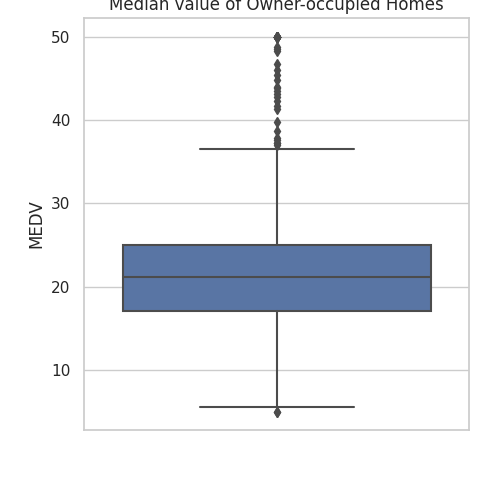

In [121]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Median value of Owner-occupied Homes')
plt.show()

## Provide a  bar plot for the Charles river variable
Findings: More tracts do not bound the Charles River (approx.480) than tracts that do bound the Charles River (approx.30).

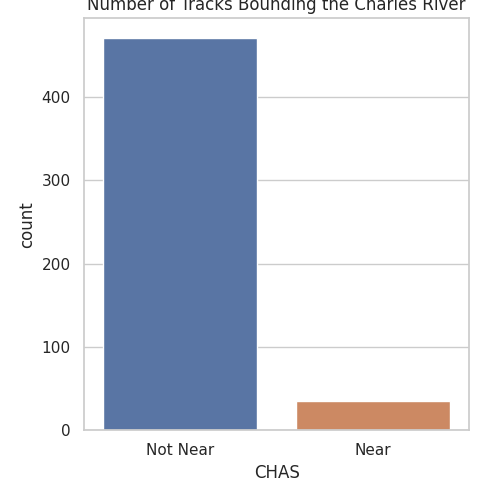

In [140]:
boston_df.loc[(boston_df['CHAS'] == 0.0), 'CHAS'] = 'Does not bound'
boston_df.loc[(boston_df['CHAS'] == 1.0), 'CHAS'] = 'Bounds'
ax = sns.countplot(x = 'CHAS', data = boston_df)
ax.set_title('Number of Tracks Bounding the Charles River')
plt.show()

##  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
Findings: Median value of owner-occupied homes tend to be higher in younger age groups (higher in =/<35yrs, than 35-70 yrs, than =/>70 yrs).

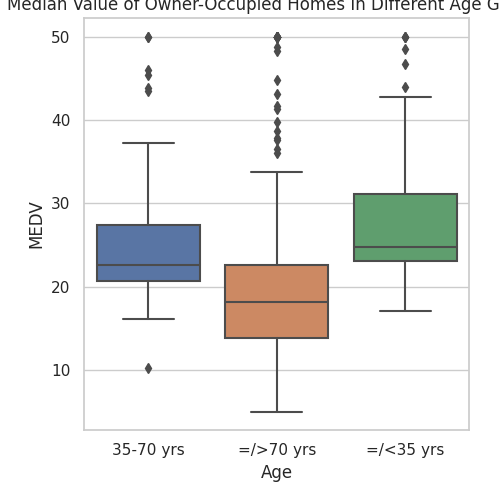

In [123]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age'] = '=/<35 yrs'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age'] = '35-70 yrs'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age'] = '=/>70 yrs'
ax = sns.boxplot(x="Age", y="MEDV", data=boston_df)
ax.set_title('Median Value of Owner-Occupied Homes In Different Age Groups')
plt.show()

##  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
Findings: There seems to generally be a generally weaker, somewhat linear, positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. As a whole, as the proportion of non-retail business acres per town increases, more NOs is produced. The relationship is stronger when there is a smaller proportion of non-retail business acres per town, and weaker when the proportion is greater.

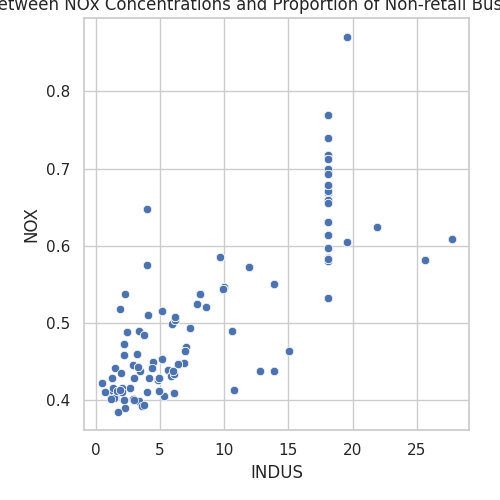

In [134]:
ax = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax.set_title('Relationship Between NOx Concentrations and Proportion of Non-retail Business Acres Per Town')
plt.show()

## Create a histogram for the pupil to teacher ratio variable
Findings: The distribution is somewhat right-skewed.

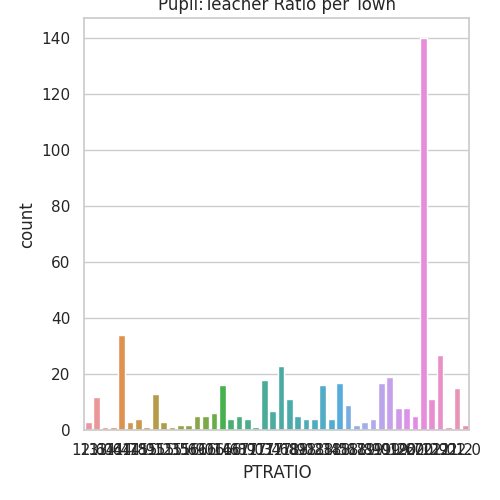

In [127]:
ax = sns.countplot(x = 'PTRATIO', data = boston_df)
ax.set_title('Pupil:Teacher Ratio per Town')
plt.show()

# Task 5


#### Be sure to:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Hypotheses: 
    - Null: There is NO difference in median value of houses bounded by the Charles River.
    - Alternative: There IS A difference in median value of houses bounded by the Charles River.
- α = 0.05
- Perform Test Statistics (below)
- Conclusion: We reject the null as the p-value of 0.003 is less than the alpha level of 0.05. There is sufficient evidence suggesting a difference in median value of houses bounded by the Charles River.

In [128]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Hypotheses: 
    - Null: There is NO difference in median values of houses for each proportion of owner occupied units built prior to 1940.
    - Alternative: There IS A difference in median values of houses for each proportion of owner occupied units built prior to 1940.
- α = 0.05
- Perform Test Statistics (below)
- Conclusion: We reject the null as the p-value of 1.71e-15 is less than the alpha level of 0.05. There is sufficient evidence suggesting a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [130]:
thirtyfive_lower = boston_df[boston_df['Age'] == '=/<35 yrs']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age'] == '35-70 yrs']['MEDV']
seventy_older = boston_df[boston_df['Age'] == '=/>70 yrs']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- Hypotheses: 
    - Null: There is NO relationship between NOx concentrations and proportion of non-retail business acres per town.
    - Alternative: There IS A relationship between NOx concentrations and proportion of non-retail business acres per town.
- α = 0.05
- Perform Test Statistics (below)
- Conclusion: We reject the null as the p-value of 7.91e-98 is less than the alpha level of 0.05. There is sufficient evidence suggesting a relationship between NOx concentrations and proportion of non-retail business acres per town.

In [131]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- Hypotheses: 
    - Null: There is NO impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
    - Alternative: There IS AN impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
- α = 0.05
- Perform Test Statistics (below)
- Conclusion: We reject the null as the p-value of 0.00 is less than the alpha level of 0.05. There is sufficient evidence suggesting there exists an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. An R value of sqrt(0.062) = 0.249 suggests a somewhat weak positive correlation between an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [132]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        22:21:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""